In [55]:
import requests

from bs4 import BeautifulSoup
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

hero = "ursa"
url = f"https://www.dotabuff.com/heroes/{hero}"

soup = BeautifulSoup(requests.get(url, headers=headers).content, "html")

In [3]:
import static_frame as sf
import requests
from . import constants

ImportError: attempted relative import with no known parent package

In [5]:
resp = requests.get("https://api.opendota.com/api/" + "heroStats")

heroes = sf.FrameGO.from_dict_records(resp.json())
heroes = heroes.set_index("id", drop=True)

# # calculate per-rank winrates
# for r in constants.RankMap:
#     heroes[f"{r.name}_wr"] = (
#         heroes[f"{r.value}_win"] / heroes[f"{r.value}_pick"]
#     )

In [61]:
winrate_columns = [f"{r.name}_wr" for r in constants.RankMap]
heroes[winrate_columns].loc[12]

Herald_wr,0.5172651141447746
Guardian_wr,0.5335407221100705
Crusader_wr,0.5334927140255009
Archon_wr,0.5335296302191098
Legend_wr,0.5280776515151515
Ancient_wr,0.5323818897637795
Divine_wr,0.5274907749077491
Immortal_wr,0.5127077223851417
Pro_wr,0.4891304347826087


In [59]:
# import static_frame as sf
# f = sf.Frame.from_dict(
#     dict(
#         a=(1,2,3),
#         b=(True,False,False),
#         c=("apple", "banana", "orange"),
#     )
# )
# print(list((x for x in "ab")))
# print(f[["a","b"]])
# print(f[(x for x in "ab")])

In [9]:
heroes.loc[[1,2,3]]["icon"].values

array(['/apps/dota2/images/dota_react/heroes/icons/antimage.png?',
       '/apps/dota2/images/dota_react/heroes/icons/axe.png?',
       '/apps/dota2/images/dota_react/heroes/icons/bane.png?'],
      dtype='<U67')

In [97]:
import warnings
from datetime import date
from pathlib import Path

import discord
import requests
import static_frame as sf
from bs4 import BeautifulSoup
from discord.ext import commands
from PIL import Image
import seaborn as sns

# import constants

warnings.filterwarnings("ignore")
import os

import matplotlib.pyplot as plt
from fuzzywuzzy import process

In [88]:
data = sf.Series.from_dict(
    mapping={
        "Herald_wr":0.5038907849829352,
        "Guardian_wr":0.5165060567359417,
        "Crusader_wr":0.5313779826863183,
        "Archon_wr":0.5310668848651217,
        "Legend_wr":0.5314645055577698,
        "Ancient_wr":0.5256943772379754,
        "Divine_wr":0.5242186072016085,
        "Immortal_wr":0.54907306434024,
        "Pro_wr":0.5517241379310345,
    }
)

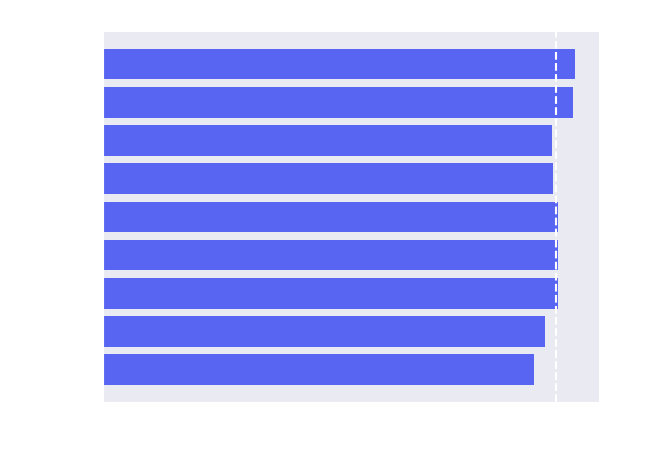

In [98]:
new_labels = [x.removesuffix("_wr") for x in data.index.values]
data = data.relabel(new_labels)
fig, ax = plt.subplots()
sns.set_palette(sns.color_palette(["#7289da", "#99aab5"]))

discord_blue = "#5865F2"
bars = ax.barh(data.index, data.values, linewidth=0, color=discord_blue)
ax.axvline(x=data.mean(), color="#ffffff", linestyle="--")

ax.set_title(f"hero winrate", color="#ffffff")
ax.set_xlabel("Win Rate", color="#ffffff")
ax.set_ylabel("Rank", color="#ffffff")

bar_x = max((bar.get_width() for bar in bars))


for i, (bar, color) in enumerate(zip(bars,colors)):
    value = data.iloc[i]    
    bar.edgewidth = None
    ax.text(
        bar_x + 0.05,
        bar.get_y() + bar.get_height() / 2,
        f"{value:.1%}",
        ha="left",
        va="center",
        color="#ffffff",
    )
    color = color


ax.tick_params(axis="x", colors="#ffffff")
ax.tick_params(axis="y", colors="#ffffff")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.grid(False)

plt.savefig(fout := f"hero_winrate_{date.today()}.png", transparent=True)

In [101]:
data.max()

0.5517241379310345

In [2]:

import discord
import yt_dlp
from discord.ext import commands


In [3]:
YTDLP_OPTS = {
    "format": "bestaudio",
    "extractaudio": True,
    "audioformat": "mp3",
    "outtmpl": "%(extractor)s-%(id)s-%(title)s.%(ext)s",
    "restrictfilenames": True,
    "noplaylist": True,
    "nocheckcertificate": True,
    "ignoreerrors": False,
    "logtostderr": False,
    "quiet": True,
    "no_warnings": True,
    "default_search": "auto",
    "source_address": "0.0.0.0",
}

FFMPEG_OPTS = {
    "before_options": "-reconnect 1 -reconnect_streamed 1 -reconnect_delay_max 5",
    "options": "-vn",
}


In [4]:
link = "https://www.youtube.com/watch?v=f8p4z83TEGg"
with yt_dlp.YoutubeDL(YTDLP_OPTS) as ydl:
    try:
        info = ydl.extract_info(link, download=False)
        url = info["url"]
    except Exception as e:
        print(f"An error occurred while trying to play the video: {e}")

In [5]:
def build_yt_embed():
    thumbnail_url = max(info['thumbnails'], key=lambda t: (t.get('width', 0), t.get('height', 0)))['url']
    uploader_name = info.get("uploader", "Uploader not found")
    uploader_url = info.get("uploader_url", "Uploader not found")
    duration = timedelta(seconds=float(info.get("duration", "Duration not found")))

In [6]:
info['webpage_url']

'https://www.youtube.com/watch?v=f8p4z83TEGg'

In [28]:
def mySqrt(x):
    start = 1
    end = x

    while start <= end:
        middle = start + (end - start) // 2
        middle_sq = middle * middle

        if middle_sq > x:
            end = middle - 1
        elif middle_sq < x:
            start = middle + 1            
        else:
            return middle

    return int(round(end))
mySqrt(1)

1

In [25]:
def mySqrt(x):
    # For special cases when x is 0 or 1, return x.
    if x == 0 or x == 1:
        return x
    
    # Initialize the search range for the square root.
    start = 1
    end = x
    mid = -1
    
    # Perform binary search to find the square root of x.
    while start <= end:
        # Calculate the middle point using "start + (end - start) / 2" to avoid integer overflow.
        mid = start + (end - start) // 2
        
        # If the square of the middle value is greater than x, move the "end" to the left (mid - 1).
        if mid * mid > x:
            end = mid - 1
        elif mid * mid == x:
            # If the square of the middle value is equal to x, we found the square root.
            return mid
        else:
            # If the square of the middle value is less than x, move the "start" to the right (mid + 1).
            start = mid + 1
    
    # The loop ends when "start" becomes greater than "end", and "end" is the integer value of the square root.
    # However, since we might have been using integer division in the calculations,
    # we round down the value of "end" to the nearest integer to get the correct square root.
    return int(round(end))
mySqrt(1024)

32